In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

def q(x, y):
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return 0.6*g1+28.4*g2/(0.6+28.4)

'''Metropolis Hastings'''
N = 100000
s = 10
r = np.zeros(2)
p = q(r[0], r[1])
print(p)

0.006324536178176621


C:\Users\nrchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  
C:\Users\nrchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  import sys


C:\Users\nrchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  
C:\Users\nrchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  import sys


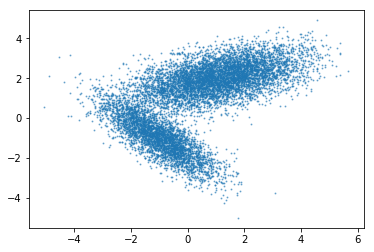

In [7]:
samples = []
for i in range(N):
    rn = r + np.random.normal(size=2)
    pn = q(rn[0], rn[1])
    if pn >= p:
        p = pn
        r = rn
    else:
        u = np.random.rand()
        if u < pn/p:
            p = pn
            r = rn
    if i % s == 0:
        samples.append(r)

samples = np.array(samples)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)

In [10]:
samples[:, 0]

array([-2.17839677,  0.04089951,  1.40458057, ..., -0.40919076,
       -0.11862212,  0.13160393])

C:\Users\nrchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  
C:\Users\nrchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  import sys


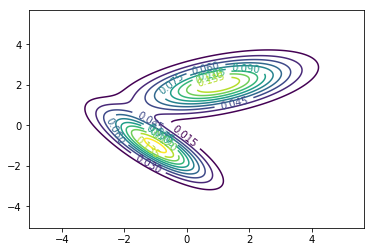

In [8]:
'''Plot target'''
dx = 0.01
x = np.arange(np.min(samples), np.max(samples), dx)
y = np.arange(np.min(samples), np.max(samples), dx)
X, Y = np.meshgrid(x, y)
Z = q(X, Y)
CS = plt.contour(X, Y, Z, 10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

**Reference : http://www.nehalemlabs.net/prototype/blog/2014/02/24/an-introduction-to-the-metropolis-method-with-python/**